# <b><center> This notebook provides an introduction to machine learning and walks through how to develop workflows for training machine learning models.</center></b>

This lesson is prepared by:
- [Daniel Marrable](http://computation.curtin.edu.au/about/computational-specialists/curtin-business-school/)
- [Kevin Chai](http://computation.curtin.edu.au/about/computational-specialists/health-sciences/)
- [Rebecca Lange](http://computation.curtin.edu.au/about/computational-specialists/humanities/)

from the [Curtin Institute for Computation](http://computation.curtin.edu.au) at Curtin University in Perth, Australia. 

Some of the materials in this notebook have been referenced and adapted from:


Make sure to open this notebook in the root directory of the code repository.

This work is made available under the [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

1. [Introduction](#1.-Introduction)
2. [Recap](#2.-Recap)
3. [Nueral Networks](#3.-Nueral Networks)


[[ go back to the top ]](#Table-of-contents)

This notebook uses several Python packages that come standard with the [Anaconda Python distribution](http://continuum.io/downloads). The primary libraries that we'll be using are:

* **NumPy**: a fast numerical array structure and helper functions.
* **pandas**: a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: a machine learning package.
* **matplotlib**: a basic plotting library; most other plotting libraries are built on top of it.
* **seaborn**: a advanced statistical plotting library.
* **keras**: a high level abstraction library for machine learning backends like theano and tensorflow.

To make sure you have all of the packages you need, install them with `conda`:

    conda install numpy pandas scikit-learn matplotlib seaborn tensorflow keras

`conda` may ask you to update some of the packages if you don't have the most recent version. Allow it to do so.

Alternatively, if you can install the packages with [pip](https://pip.pypa.io/en/stable/installing/) (a Python package manager):

    pip install numpy pandas scikit-learn matplotlib seaborn tensorflow keras

# What to expect and what will be covered:

## What will be covered:
* Practical examples of machine learning.

## What will not be covered:
* Rigorous mathematical working and proofs.   There simply isn't enough time in a workshop format.  We will provide links and material that you can and should read.

## Recap

STUFF!!!

In [1]:
%matplotlib inline

## Neural Networks

In [20]:
import numpy as np
import pylab
from IPython.display import Image

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

Keras has a number of standard datasets that we can use to build and train our model.  In this example we will use the [MNIST](https://en.wikipedia.org/wiki/MNIST_database) Digits dataset

<center><img src='media/mnist_digits.png'></center>

<b>Use Keras to download the mnist data set</b>

We also use one of Keras' helper functions to automatically split the dataset into training and testing data sets.

In [21]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

<b> <center> Lets take a look at some of the images and their corresponding labels

Digit 4



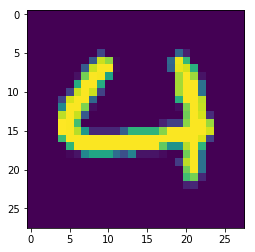

In [22]:
image_number = 60  # Change me to see the different digits and their labels

pylab.imshow(x_train[image_number])
print("Digit {}".format(y_train[image_number]))
print("")  # just give us some space

<b>We need to 'flatten' our array so that it is a single row.

Currently we have images that are 28px by 28px.  If we flatten it, we will have a 1px by 784px

In [23]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')

In [24]:
print(x_train[image_number].shape)

(784,)


<b> Now we 'normalise' the data.

This is a very important step.  We want our pixels to be between 0 and 1



In [25]:
x_train = x_train / np.max(x_train)
x_test = x_test / np.max(x_test)

print(np.max(x_train))

1.0


### Create a simple single layer perceptron

In [26]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=784))
model.add(Dense(units=10, activation='softmax'))

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.utils import plot_model

plot_model(model, to_file='media/model.png')

Image("media/model.png")

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

### Complile the model
Once that we are happy with our model archetecture, we compile the model


In [29]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Explain the loss, optimizer and metrics.  What are they ??

In [30]:
import keras.utils

In [31]:
# one hot encode outputs
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
num_classes = y_test.shape

In [32]:
y_train[9]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [33]:
print(x_train.shape)
print(y_train.shape)


(60000, 784)
(60000, 10)


In [34]:
print(x_test.shape)
print(y_test.shape)

(10000, 784)
(10000, 10)


### Start training the model

In [35]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.2598 - acc: 0.9259 - val_loss: 0.1427 - val_acc: 0.9568
Epoch 2/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.1159 - acc: 0.9654 - val_loss: 0.0990 - val_acc: 0.9701
Epoch 3/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.0796 - acc: 0.9761 - val_loss: 0.0888 - val_acc: 0.9726
Epoch 4/5
60000/60000 [==============================] - 6s 103us/step - loss: 0.0586 - acc: 0.9817 - val_loss: 0.0782 - val_acc: 0.9766
Epoch 5/5
60000/60000 [==============================] - 6s 103us/step - loss: 0.0460 - acc: 0.9859 - val_loss: 0.0747 - val_acc: 0.9772


In [36]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 2.28%


In [37]:
x_test[0:1].shape

(1, 784)

In [38]:
y_test[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [39]:
number_line = np.linspace(0,9,10)

print(number_line)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [40]:
number_line[np.asarray(y_test[1], dtype=bool)]

array([2.])

Predicted digit is :: 2

Actual digit is :: [2.]



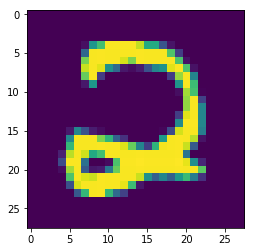

In [43]:
valid_class = 550   # <-- Change me to see different predictions.
classes = model.predict(x_test[valid_class - 1:valid_class])
print("Predicted digit is :: {}".format(np.argmax(classes)))
print()
print("Actual digit is :: {}".format(number_line[np.asarray(y_test[valid_class - 1], dtype=bool)]))
print()

pylab.imshow(x_test[valid_class -1].reshape(28, 28))


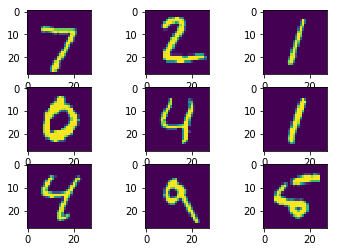

In [26]:
for i in range(0, 9):
    pylab.subplot(330 + 1 + i)
    pylab.imshow(x_test[i].reshape(28, 28))
# show the plot
pylab.show()